## BINARY CLASSIFICATION

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None

In [45]:
## read the file
train = pd.read_csv(r'F:\ARYA.AI\training_set.csv')
test = pd.read_csv(r'F:\ARYA.AI\test_set.csv')

## EXPLORATORY ANALYSIS

In [46]:
train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [47]:
train.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


In [48]:
test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [49]:
test.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
686,686,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.25,0.0,0.0,0.00,0.00,0.0,0.00,0.25,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,2.06,1.03,0.25,0.25,0.25,0.25,0.25,0.25,2.83,0.25,0.25,0.25,0.25,0.0,0.0,0.25,0.0,0.00,0.25,0.00,0.25,0.0,0.0,0.00,0.301,0.473,0.043,0.043,0.000,0.0,2.111,17,190
687,687,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.56,2.56,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2.56,0.0,0.0,2.56,0.000,0.000,0.000,0.375,0.000,0.0,2.250,7,36
688,688,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.333,5,7
689,689,0.08,0.08,0.57,0.0,0.48,0.0,0.0,0.08,0.00,0.0,0.0,0.81,0.08,0.0,0.08,0.00,0.81,0.0,0.65,0.0,0.4,0.0,0.0,0.0,1.38,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.16,0.00,0.08,0.00,0.08,0.0,0.0,0.08,0.0,0.89,0.00,0.24,0.08,0.0,0.0,0.08,0.011,0.034,0.000,0.057,0.022,0.0,1.875,65,542
690,690,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.32,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2.32,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.000,4,16


In [50]:
train.shape, test.shape

((3910, 59), (691, 58))

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [52]:
## Removing unwanted features
train.drop(columns='Unnamed: 0',inplace=True)
test.drop(columns='Unnamed: 0',inplace=True)

In [53]:
## Check the distribution of classes (Y)
train.Y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [54]:
## Split the data into train and validation set
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train.drop('Y', 1), 
                                                train.Y, 
                                                test_size = 0.20)
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape

((3128, 57), (3128,), (782, 57), (782,))

## Quasi-Constant Features

In [55]:
# using sklearn variance threshold to find constant features

from sklearn.feature_selection import VarianceThreshold

## Finding the columns having more than 75% singularities
sel = VarianceThreshold(threshold=0.25)

In [56]:
sel.fit(train_x)

VarianceThreshold(threshold=0.25)

In [57]:
sum(sel.get_support())

26

In [58]:
## Non constant features
len(train_x.columns[sel.get_support()])

26

In [59]:
# print the constant features
print(
    len([
        x for x in train_x.columns
        if x not in train_x.columns[sel.get_support()]
    ]))

[x for x in train_x.columns if x not in train_x.columns[sel.get_support()]]

31


['X1',
 'X6',
 'X7',
 'X8',
 'X9',
 'X11',
 'X13',
 'X14',
 'X15',
 'X17',
 'X20',
 'X23',
 'X24',
 'X30',
 'X31',
 'X32',
 'X34',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X43',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X53',
 'X54']

In [60]:
## Removing the Quasi-Constant Features
for i in [x for x in train_x.columns if x not in train_x.columns[sel.get_support()]]:
    train_x = train_x.drop([i], axis=1)
    valid_x = valid_x.drop([i], axis=1)
    test = test.drop([i], axis = 1)

## FEATURE SELECTION USING RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_x, train_y)

RandomForestClassifier()

In [62]:
rf.feature_importances_

array([0.0098551 , 0.01942013, 0.00095564, 0.03953331, 0.01424852,
       0.02091802, 0.08904138, 0.01426002, 0.04408295, 0.10895082,
       0.00291071, 0.06617059, 0.03192604, 0.03215997, 0.00828643,
       0.00271231, 0.00466886, 0.0054872 , 0.0090673 , 0.0029741 ,
       0.015983  , 0.03425641, 0.16045683, 0.09456296, 0.09308578,
       0.0740256 ])

In [63]:
train_x.columns

Index(['X2', 'X3', 'X4', 'X5', 'X10', 'X12', 'X16', 'X18', 'X19', 'X21', 'X22',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X33', 'X35', 'X42', 'X44', 'X45',
       'X46', 'X52', 'X55', 'X56', 'X57'],
      dtype='object')

In [64]:
## create dataframe to compare the feature importances with respected columns
feature_importance = pd.DataFrame({"Features" : train_x.columns,
                                   "Score"    : rf.feature_importances_ * 100})
feature_importance = feature_importance.sort_values("Score", ascending = False)  ## arrange columns in descending order
feature_importance

,Features,Score
22,X52,16.045683
9,X21,10.895082
23,X55,9.456296
24,X56,9.308578
6,X16,8.904138
25,X57,7.402560
11,X25,6.617059
8,X19,4.408295
3,X5,3.953331
21,X46,3.425641


Text(0.5, 1.0, 'Feature Importance Plot')

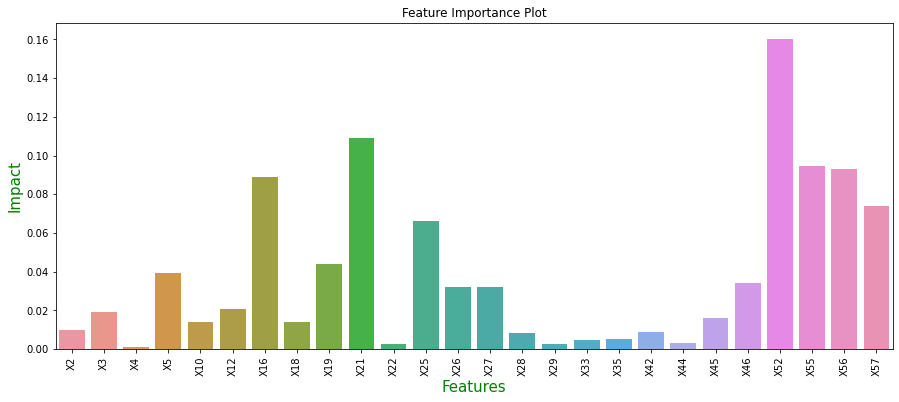

In [65]:
plt.figure(figsize = (15, 6))
sns.barplot(y = rf.feature_importances_,x = train_x.columns.values)
plt.xlabel('Features', color = 'g', size = 15)
plt.ylabel('Impact', color = 'g', size = 15)
plt.xticks(rotation = 90)
plt.title('Feature Importance Plot')

###### HERE WE CAN SEE THAT, THE TOP DECIDING FACTORS OF TARGET VARIABLE ARE:
###### 1) X52
###### 2) X55
###### 3) X21
###### 4) X16
###### 5) X56

In [66]:
## Selecting first 14 features who are having cumulative score of 90%
np.sum(feature_importance['Score'][0: 14])

90.85907955884113

In [67]:
## Dropping all the least important columns
for i in list(feature_importance['Features'][14: ]):
    train_x = train_x.drop([i], axis=1)
    valid_x = valid_x.drop([i], axis=1)
    test = test.drop([i], axis = 1)

In [68]:
train_x.shape, valid_x.shape, test.shape

((3128, 14), (782, 14), (691, 14))

## MODEL BUILDING
#### Model Building with only the important features selected

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150, criterion='entropy') 

rfc.fit(train_x, train_y)

pred_rfc = rfc.predict(valid_x)
pred_rfc

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

#### CONFUSION MATRIX

In [70]:
from sklearn.metrics import confusion_matrix

tab_rfc = confusion_matrix(pred_rfc, valid_y)
tab_rfc

array([[455,  26],
       [ 26, 275]], dtype=int64)

#### ACCURACY SCORE

In [71]:
from sklearn.metrics import accuracy_score

acc_rfc = accuracy_score(pred_rfc, valid_y) * 100
acc_rfc

93.35038363171356

#### TRUE POSITIVE RATIO

In [72]:
tpr_rfc = (tab_rfc[1][1])/(tab_rfc[1][1]+tab_rfc[0][1])
tpr_rfc

0.9136212624584718

#### FALSE POSITIVE RATIO

In [73]:
fpr_rfc = (tab_rfc[1][0])/(tab_rfc[1][0]+tab_rfc[0][0])
fpr_rfc

0.05405405405405406

#### PRECISION

In [74]:
precision_rfc = (tab_rfc[1][1])/(tab_rfc[1][1]+tab_rfc[1][0])
precision_rfc

0.9136212624584718

#### F1 RATIO

In [75]:
F1_rfc = 2 * (precision_rfc * tpr_rfc) / (precision_rfc + tpr_rfc)
F1_rfc

0.9136212624584718

#### ROCAUC 

In [76]:
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(pred_rfc, valid_y)
rfc_roc_auc

0.9297836042022088

In [77]:
pred_value_proba = rfc.predict_proba(valid_x)
pred_value_proba = pred_value_proba[:, 1]

In [78]:
fpr, tpr, threshold = roc_curve(valid_y, pred_value_proba)

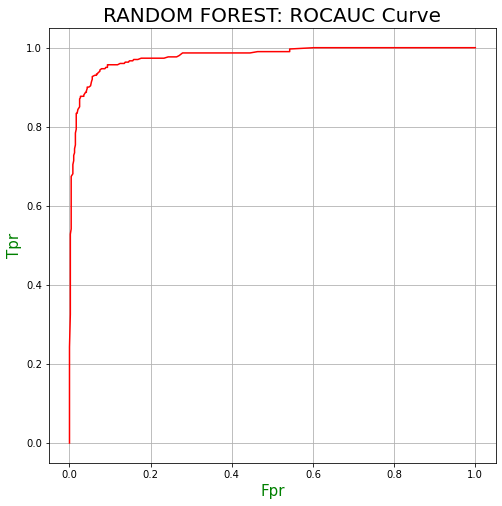

In [79]:
fig = plt.figure(figsize =(8,8))
plt.plot(fpr, tpr, color = 'red')
plt.xlabel('Fpr', color = 'g', size = 15)
plt.ylabel('Tpr', color = 'g', size = 15)
plt.title('RANDOM FOREST: ROCAUC Curve', size = 20)
plt.grid()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       481
           1       0.91      0.91      0.91       301

    accuracy                           0.93       782
   macro avg       0.93      0.93      0.93       782
weighted avg       0.93      0.93      0.93       782



In [81]:
performance_matrices = pd.DataFrame({'Algorithm' : ['Random Forest'],
                                     'Accuracy' : [ acc_rfc],
                                     'Tpr' : [tpr_rfc],
                                     'Fpr' : [fpr_rfc],
                                     'Precision' : [precision_rfc],
                                     'F1 Score'  : [F1_rfc],
                                     'AUROC'   : [rfc_roc_auc]})
performance_matrices

,Algorithm,Accuracy,Tpr,Fpr,Precision,F1 Score,AUROC
0,Random Forest,93.350384,0.913621,0.054054,0.913621,0.913621,0.929784


###### AFTER SEEING THE ABOVE PERFORMANCE MATRICES, WE CAN SEE THAT RANDOM FOREST IS GIVING GOOD OVERALL PERFORMANCE.
###### THE MODEL HAS HIGH ACCURACY, GOOD TPR, LOW FPR, HIGH PRECISION AND GOOD AUCROC SCORE.
###### SO USING THE RANDOM FOREST FOR PREDICTION.

## PREDICTION ON TEST DATA

In [82]:
pred_test_rfc = rfc.predict(test)
pred_test_rfc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,